# Backend Test on the API

In [1]:
import requests

## Different URL routes

In [2]:
URL = "http://localhost:8000"
HEALTH_URL = URL + "/health"
PREDICT_URL = URL + "/predict"
UPLOAD_URL = URL + "/upload"

## Test functions

In [3]:
def test_health():
    response = requests.get(HEALTH_URL)
    assert response.status_code == 200
    assert response.json() == {"status": "ok", "message": "Backend is up and running!"}
    return response.json()

In [11]:
def test_upload():
    # response = requests.post(UPLOAD_URL, files={"file": open("./../../data/raw/Data_npy/DATA_001_Trial1.npy", "rb")})
    response = requests.post(
        UPLOAD_URL, files={"file": open("./../../data/raw/Data_npy/DATA_001_Trial1.npy", "rb")}
    )

    if response.status_code != 200:
        print(response.text)
    # assert response.status_code == 200
    # assert response.json()["patient_id"] == "004"
    # assert response.json()["session_id"] == "Trial1"
    # assert response.json()["stroke_side"] == "G"
    return response.json()

In [28]:
def test_predict():
    body = {
        "model": "RIEMANN_SVM_MVT_V1",
        "arm_side": "D",
        "data_location": "./temp/DATA_001_Trial1.npy",
        "brain_side": "G",
        "bad_channels": ["Cz"],
    }
    response = requests.post(PREDICT_URL, json=body)
    if response.status_code != 200:
        print(response.json())
    assert response.status_code == 200
    assert type(response.json()["prediction_density_plot"]) == str
    assert type(response.json()["signals"]["time"]) == list
    return response.json()

## Running the tests

In [29]:
%%time
test_health()


CPU times: total: 0 ns
Wall time: 2.03 s


{'status': 'ok', 'message': 'Backend is up and running!'}

In [30]:
%%time
result = test_upload()

CPU times: total: 312 ms
Wall time: 17.9 s


In [31]:
result.keys()

dict_keys(['patient_id', 'session_id', 'stroke_side', 'signal_left_arm', 'signal_right_arm', 'models_available', 'models_info', 'data_location'])

In [32]:
result['models_available']

['RIEMANN_SVM_MVT_V1', 'RIEMANN_SVM_MVT_V2']

In [33]:
%%time
test_predict()

CPU times: total: 656 ms
Wall time: 18.1 s


{'prediction_density_plot': 'iVBORw0KGgoAAAANSUhEUgAAB9AAAAH0CAYAAABl1bZjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd5wdVd0/8M/cvr23NEhACKEGkPKAFIGE0BVBQR4BKYqgIAoafagPD1EQGyLgDw1KkSq9hpYAgrQkEEICqZuy2d53b535/TFzZubOzr17d/eWuXc/79crkNw67c6cOd/z/R5JURQFREREREREREREREREREREk5wr1wtARERERERERERERERERETkBAygExERERERERERERERERERgQF0IiIiIiIiIiIiIiIiIiIiAAygExERERERERERERERERERAWAAnYiIiIiIiIiIiIiIiIiICAAD6ERERERERERERERERERERAAYQCciIiIiIiIiIiIiIiIiIgLAADoREREREREREREREREREREABtCJiIiIiIiIiIiIiIiIiIgAMIBOREREREREREREREREREQEgAF0IiIiIiIiIiIiIiIiIiIiAAygExERERERERERERERERERAWAAnYiIiIiIiIiIiIiIiIiICAAD6ERERERERERERERERERERAAYQCciIiIiIiIiIiIiIiIiIgLAADoREREREREREREREREREREABtCJiIiIiIiIiIiIiIiIiIgAMIBOREREREREREREREREREQEgAF0IiIiIiIiIiIiIiIiIiIiAAygExERERERERERERERERERAWAAnYiIiIiIiIiIiIiIiIiICAAD6ERERERERERERERERERERAAYQCciIiIiIiIiIiIiIiIiIgLAADoREREREREREREREREREREABtCJiIiIiIiIiIiIiIiIiIgAMIBORERERERERERERER

## Debbuging

In [8]:
result["signal_left_arm"]

NameError: name 'result' is not defined

In [1]:
from fastapi import APIRouter, File, UploadFile, HTTPException
from services import data_extraction
from schemas import schemas
import os


TEMP_FOLDER = "temp"
MODEL_FOLDER = "models"
HEAD_SIDE_RIGHT = "D"
HEAD_SIDE_LEFT = "G"
ARM_SIDE_RIGHT = "D"
ARM_SIDE_LEFT = "G"


def save_file_temporarily(file):
    temp_location = f"{TEMP_FOLDER}/DATA_005_Trial1.npy"

    with open(temp_location, "wb+") as file_object:
        file_object.write(file.read())
    return temp_location


def upload_file(file: UploadFile = File(...)):
    # Supprimer les fichiers temporaires
    # data_extraction.remove_temporary_files()

    # Enregistrer temporairement le fichier reçu
    data_location = save_file_temporarily(file)

    # Extraire les informations de session du fichier
    session_info = data_extraction.extract_data_session(data_location)

    # Retourner les informations au frontend pour affichage
    return session_info


file = open("./../../data/raw/Data_npy/DATA_005_Trial1.npy", "rb")
upload_file(file)

SessionInfo(patient_id='005', session_id='Trial1', stroke_side='G', signal_left_arm=SignalInfo(duration=304.8408203125, first_movement_time=11.312, last_movement_time=264.656, electrodes=['AF3', 'AF4', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'FT7', 'FT8', 'Fp1', 'Fp2', 'Fpz', 'Fz', 'Iz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8'], electrodes_right_image='iVBORw0KGgoAAAANSUhEUgAABdwAAAXcCAYAAAA4NUxkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd5gb5fU24GdGva229+K+XvfeDQYMpoWaBAglBgKppPfkl5CQfAmkkQ4EjEkwkEBogdACtjHFNu51bW/z9l7U28x8f0ialbbYa3t3teW5r8uXpdFI+0qrlWbOe95zBEVRFBARERERERERERER0TkREz0AIiIiIiIiIiIiIqKxgAF3IiIiIiIiIiIiIqJBwIA

d:\Documents\Scolaires\SUPAERO\3A\PIE\PIE_2023\app\backend\venv_backend\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Documents\Scolaires\SUPAERO\3A\PIE\PIE_2023\app\backend\venv_backend\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Documents\Scolaires\SUPAERO\3A\PIE\PIE_2023\app\backend\venv_backend\Lib\site-packages\sklearn\base.py:376: InconsistentVe

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

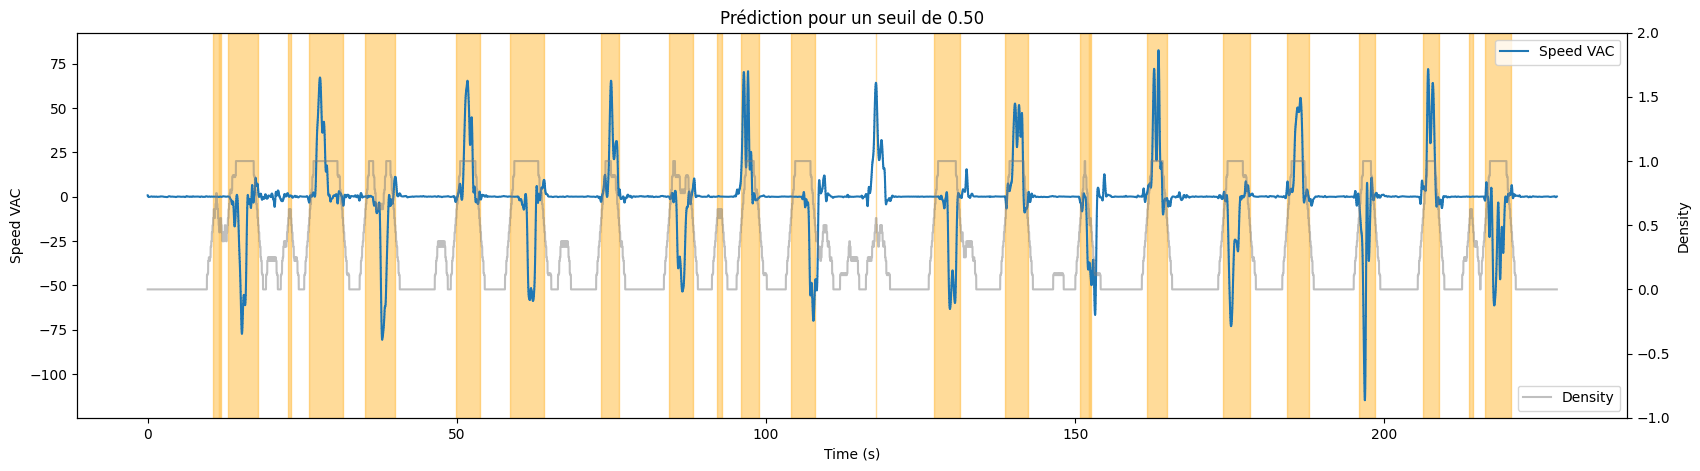

In [1]:
from fastapi import APIRouter, HTTPException
from schemas import schemas
from services import (
    prediction_service,
    preprocessing_service,
    plot_service,
    data_extraction,
)
from models.pipelines import pipelines

router = APIRouter()

TEMP_FOLDER = "temp"
PLOT_NAME = "density_plot.png"
THRESHOLD_DENSITY_PREDICTION = 0.5
PLOT = True
PLOT_DENSITY = True


def predict(user_selection: schemas.UserSelection):
    """
    Recevoir les données EEG et renvoyer une prédiction d'intention de mouvement.
    """
    pipeline = pipelines[user_selection.model]

    # Prétraitement basé sur la sélection de l'utilisateur
    raws, processing_info = preprocessing_service.prepare_data(user_selection, pipeline)

    # Transformation des données eeg en fenêtres glissantes pour traitement dans le classifieur
    windows = preprocessing_service.creating_sliding_windows(raws, pipeline)

    # Prédiction basés sur les données EEG reçues
    predictions, pipeline_info = prediction_service.predict(windows, processing_info)

    # Reconstruction de la prédiction sur le signal temporel (densité de prédiction)
    movement_density = prediction_service.density_on_prediction(
        raws, predictions, pipeline
    )
    print(movement_density)
    movement_times = plot_service.density_plot(
        raws,
        movement_density,
        threshold=THRESHOLD_DENSITY_PREDICTION,
        plot=PLOT,
        plot_density=PLOT_DENSITY,
        name=f"{TEMP_FOLDER}/{PLOT_NAME}",
    )
    encoded_string = (
        plot_service.encode_image_to_base64(f"{TEMP_FOLDER}/{PLOT_NAME}")
        if PLOT
        else None
    )

    signals = schemas.Signals(
        time=list(raws.times),
        movement_density=list(movement_density),
        sfreq=raws.info["sfreq"],
        speed=list(raws["VAC"][0][0]),
    )
    prediction_result = schemas.PredictionResult(
        prediction_density_plot=encoded_string if PLOT else None,
        signals=signals,
        processing_info=processing_info,
        pipeline=pipeline,
    )

    # Supprimer les fichiers temporaires
    # data_extraction.remove_temporary_files()

    # Retourner le résultat sous forme d'un objet PredictionResult
    return movement_density


user_selection = schemas.UserSelection(
    model="RIEMANN_SVM_MVT_V1",
    arm_side="D",
    data_location="./temp/DATA_005_Trial1.npy",
    brain_side="G",
)

movement_density = predict(user_selection)

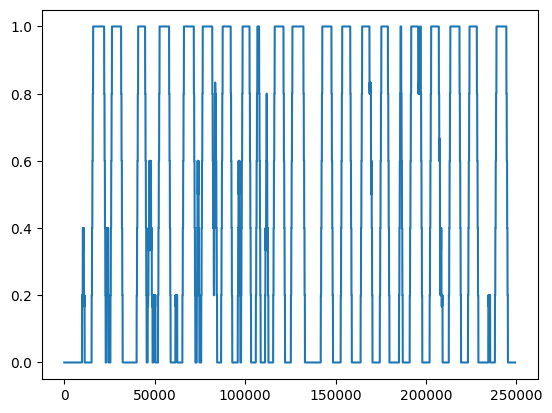

In [2]:
import matplotlib.pyplot as plt

plt.plot(movement_density)